In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import os, sys
module_path = os.path.abspath(os.path.join('..', "src"))
if module_path not in sys.path:
    sys.path.append(module_path)
import train

In [7]:
config = train.train_config
root_path = ".."
models_path = os.path.join(root_path, "models_test")
if not os.path.isdir(models_path):
    os.mkdir(models_path)
ds_dir = os.path.join(root_path, "dataset","UBO2014")
ds_path = os.path.join(ds_dir,".".join((config["ds_name"], "btf")) )
save_path = os.path.join(models_path, config["ds_name"])
            
if not os.path.isdir(save_path):
    os.mkdir(save_path)

config["out_path"] = os.path.join(save_path,'{}.pth'.format("test"))

In [58]:
from dataset import BTFDataset

btf_ds = BTFDataset(ds_path, train_size=1024)

importing btf dataset: ../dataset/UBO2014/leather11.btf 



  0%|          | 0/1024 [00:00<?, ?it/s]

In [37]:
model = train.init_model(config)

NeuBTF(
  (tex): NeuMipMap(
    (levels): ModuleList(
      (0): NeuTex()
      (1): NeuTex()
      (2): NeuTex()
      (3): NeuTex()
    )
  )
  (off_tex): NeuMipMap(
    (levels): ModuleList(
      (0): NeuTex()
      (1): NeuTex()
      (2): NeuTex()
      (3): NeuTex()
    )
  )
  (net): Siren(
    (net): Sequential(
      (0): SineLayer(
        (linear): Linear(in_features=34, out_features=32, bias=True)
      )
      (1): SineLayer(
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (2): SineLayer(
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (3): Linear(in_features=32, out_features=3, bias=True)
    )
  )
  (off_net): Siren(
    (net): Sequential(
      (0): SineLayer(
        (linear): Linear(in_features=31, out_features=32, bias=True)
      )
      (1): SineLayer(
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (2): SineLayer(
        (linear): Linear(in_features=32, out_f

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

/home/traverse/GitHub/NeuBTF/src/utils.py:20: RuntimeWarning: invalid value encountered in power
  return image**(1./gamma)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


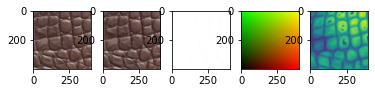

  0%|          | 0/1024 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


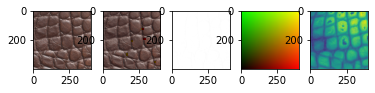

In [54]:
model, history = train.train(config, model=model, btf_ds=btf_ds)

Text(0, 0.5, 'loss')

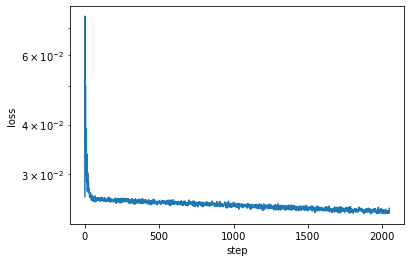

In [55]:
import matplotlib.pyplot as plt

overview = history.flatten()
plt.plot(range(len(overview)), overview)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

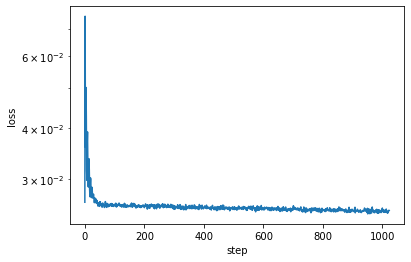

In [56]:
epoch = history[0]
plt.plot(range(len(epoch)), epoch)
plt.yscale("log")
plt.xlabel("step")
plt.ylabel("loss")

In [66]:
from dataset import BTFDataset
coords, level, wi, wo = BTFDataset.get_input(512)

In [78]:
output = model.btf_sample(wi, wo, coords)

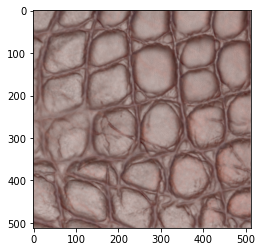

In [81]:
import utils 
output = utils.gamma_correction(np.maximum(output,0.))
plt.imshow(output.reshape(512, 512, 3))

In [108]:
from ipywidgets import HBox, VBox, Button, Layout, Label, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

wi_theta = IntSlider(value=0, min=-90,max=90,step=1, description='wi theta:')
wi_phi = IntSlider(value=0, min=-360,max=360, step=1, description='wi phi')
wo_theta = IntSlider(value=0, min=-90,max=90,step=1, description='wo theta:')
wo_phi = IntSlider(value=0, min=-360,max=360, step=1, description='wo phi')


def hist1(wi_theta, wi_phi, wo_theta, wo_phi):
    coords, level, wi, wo = BTFDataset.get_input(512,wi=[wi_theta, wi_phi], wo=[wo_theta, wo_phi])
    output = model.btf_sample(wi, wo, coords)
    output = utils.gamma_correction(np.maximum(output,0.))
    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(output.reshape(512, 512, 3))
    
    ax2 = plt.subplot(1, 2, 2, projection='3d')
    ax2.scatter3D(wo[:1,:1, 0], wo[:1,:1, 1], wo[:1,:1, 2], c='red')
    ax2.scatter3D(wi[:1,:1, 0], wi[:1,:1, 1], wi[:1,:1, 2], c='blue')
    ax2.scatter3D([0,], [0,], [0,], c='black')
    ax2.set_xlim(-1.,1.)
    ax2.set_ylim(-1.,1.)
    ax2.set_zlim(0.,1.)



out1 = interactive(hist1, wi_theta=wi_theta, wi_phi=wi_phi, wo_theta=wo_theta, wo_phi=wo_phi)

display(out1)

interactive(children=(IntSlider(value=0, description='wi theta:', max=90, min=-90), IntSlider(value=0, descrip…